
# Project: EDA How Does Daily Yoga Impact Screen Time Habits

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The Kaggle dataset contains information on daily minutes of screen time habits, categorized by type of usage, as well as the effect of yoga on those habits. The main goal is understanding how daily yoga impact screen time habits analyzing descriptive and inferential statistics, performing Hypothesis Test (t-Test).
>
> Reference: https://www.kaggle.com/datasets/thedevastator/how-does-daily-yoga-impact-screen-time-habits?resource=download

<a id='wrangling'></a>
## Data Wrangling

Loading in the user data, checking for cleanliness, and then trimming and cleaning the dataset for analysis.

### General Properties

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, levene

plt.rcParams["figure.figsize"] = (15,8)
sns.set_theme()

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip drive/MyDrive/colab_notebooks/archive.zip

Archive:  drive/MyDrive/colab_notebooks/archive.zip
replace Screen Time Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Screen Time Data.csv    


### Data Cleaning

In [ ]:
df = pd.read_csv('Screen Time Data.csv', index_col='index')

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [ ]:
df.head()

,date,week_day,total_screen_time,social_networking,reading_and_reference,other,productivity,health_and_fitness,entertainment,creativity,yoga
index,,,,,,,,,,,
0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0


In [ ]:
df.shape

(28, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   28 non-null     object
 1   week_day               28 non-null     object
 2   total_screen_time      28 non-null     int64 
 3   social_networking      28 non-null     int64 
 4   reading_and_reference  28 non-null     int64 
 5   other                  28 non-null     int64 
 6   productivity           28 non-null     int64 
 7   health_and_fitness     28 non-null     int64 
 8   entertainment          28 non-null     int64 
 9   creativity             28 non-null     int64 
 10  yoga                   28 non-null     int64 
dtypes: int64(9), object(2)
memory usage: 2.6+ KB


<a id='eda'></a>
## Exploratory Data Analysis

Computing statistics and creating visualizations with the goal of addressing the research questions that is posed in the Introduction section. 

In [ ]:
# check total screen time

df['total_screen_time'].sum() == (df['social_networking']+df['reading_and_reference']+df['other']+df['productivity']+df['health_and_fitness']+df['entertainment']+df['creativity']).sum()

False

In [ ]:
# fix total screen time

df['total_screen_time'] = df['social_networking']+df['reading_and_reference']+df['other']+df['productivity']+df['health_and_fitness']+df['entertainment']+df['creativity']

### Total Screen Time

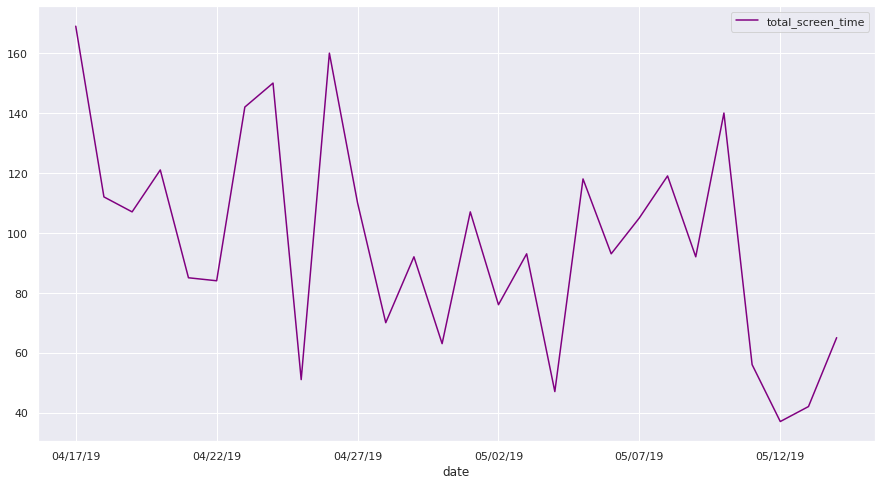

In [ ]:
df.plot.line(x='date', y ='total_screen_time', color='purple')

P.S. Yoga practices started on 2019-04-29. It is possible to notice a downward trend from this date.

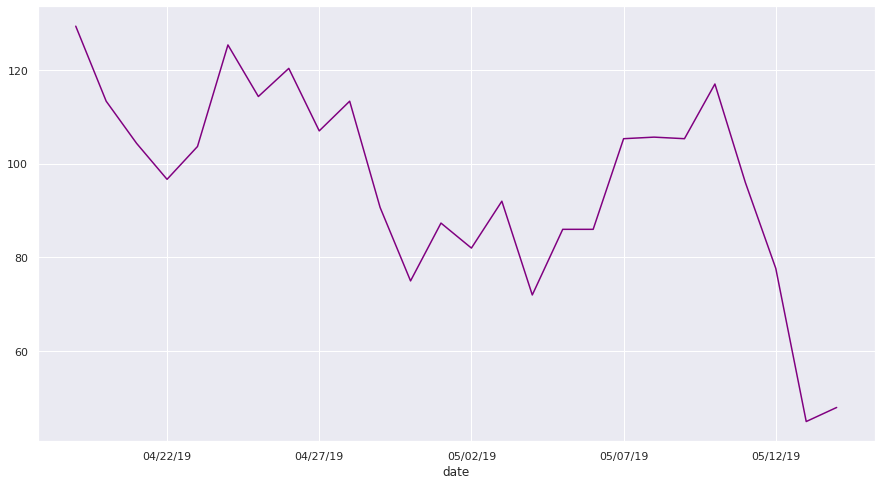

In [ ]:
df.groupby('date')['total_screen_time'].sum().rolling(window=3, min_periods=3).mean().plot(color='purple')

With the three-day rolling average of total screen time per day is easier to observe the downward trend.

In [ ]:
def weekday2num(x):
  nums = range(7)
  wdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

  wday_map = {wday: num for wday, num in zip(wdays, nums)}

  return x.map(wday_map)

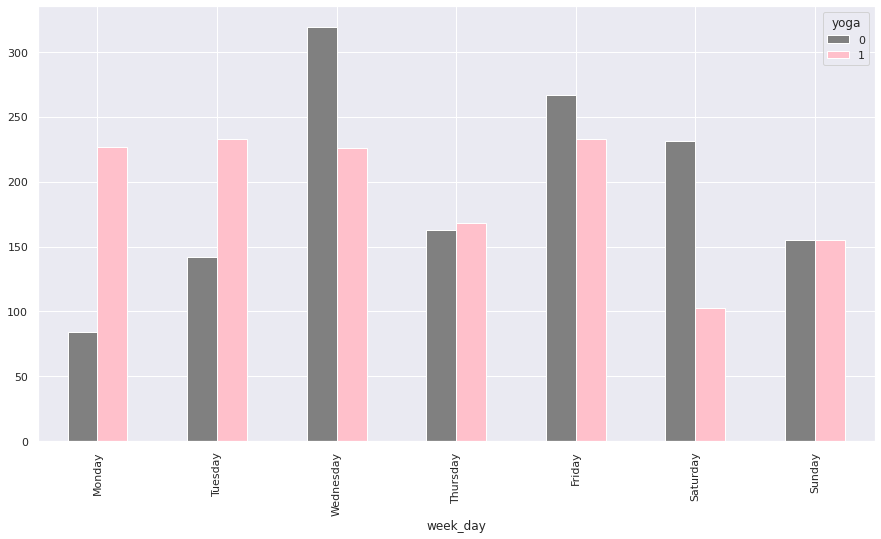

In [ ]:
df.groupby(['week_day', 'yoga'])['total_screen_time'].sum().unstack().sort_index(key=weekday2num).plot.bar(color=['grey', 'pink'])

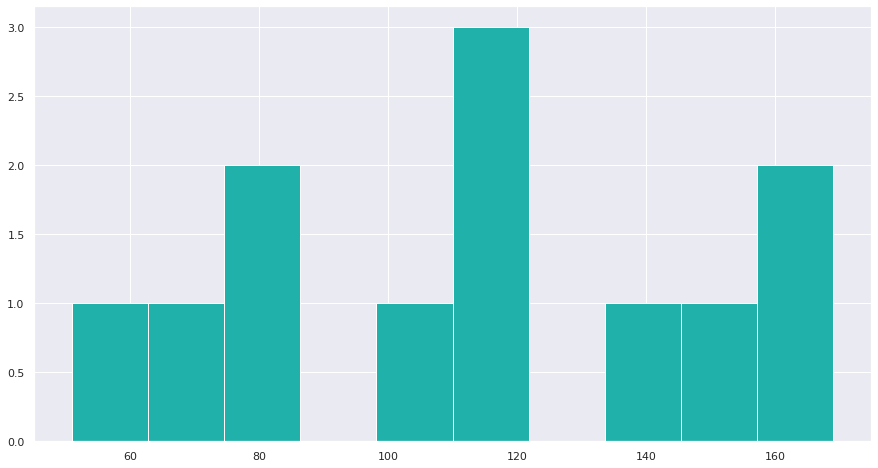

In [ ]:
df['total_screen_time'].loc[df['yoga']==0].hist(color='lightseagreen')
plt.rcParams["figure.figsize"] = (15,8)

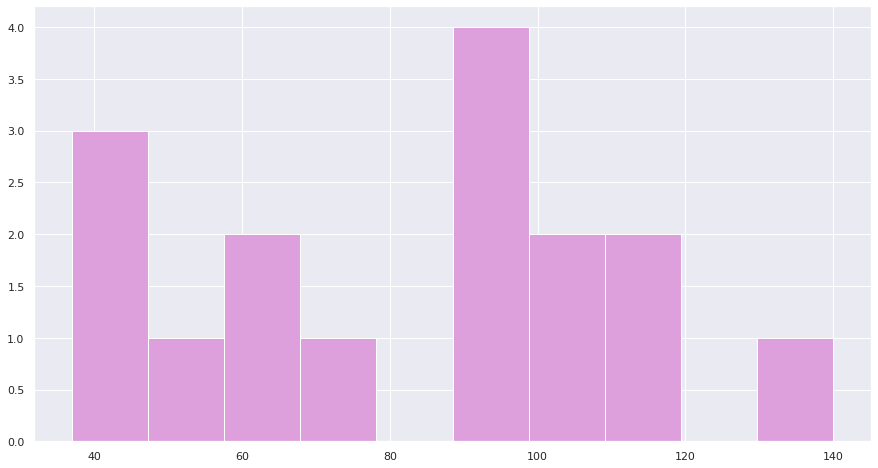

In [ ]:
df['total_screen_time'].loc[df['yoga']==1].hist(color='plum')
plt.rcParams["figure.figsize"] = (15,8)

In [ ]:
df['total_screen_time'].loc[df['yoga']==0].describe()

count     12.000000
mean     113.416667
std       36.903950
min       51.000000
25%       84.750000
50%      111.000000
75%      144.000000
max      169.000000
Name: total_screen_time, dtype: float64

In [ ]:
df['total_screen_time'].loc[df['yoga']==1].describe()

count     16.000000
mean      84.062500
std       30.297346
min       37.000000
25%       61.250000
50%       92.000000
75%      105.500000
max      140.000000
Name: total_screen_time, dtype: float64

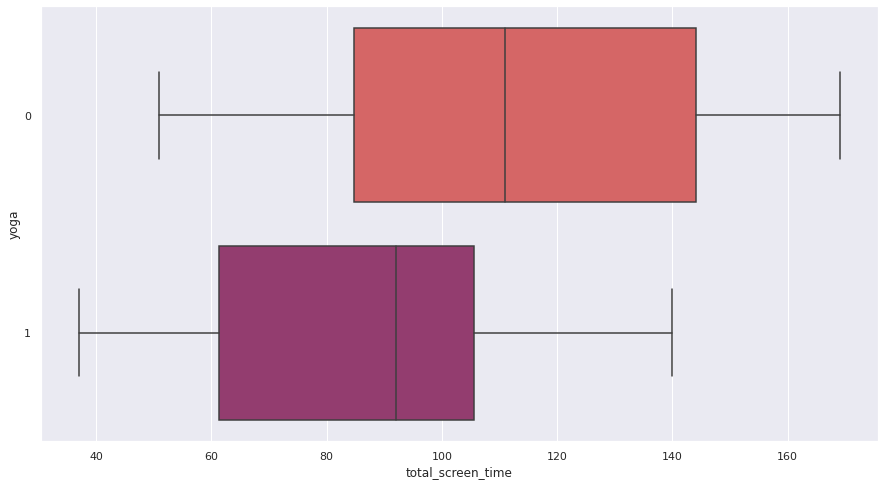

In [ ]:
sns.boxplot(data=df, x='total_screen_time', y='yoga', palette="flare", saturation=0.85, orient="h")


Without yoga's data has a most concentration to right, high values,
and with yoga's data has a most concentration to left, low values. No outliers detected.


### Types of apps

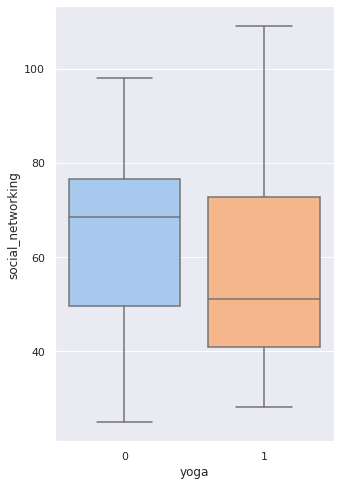

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))

sns.boxplot(data=df, y='social_networking', x='yoga', palette="pastel", saturation=0.85, ax=ax)
plt.show()

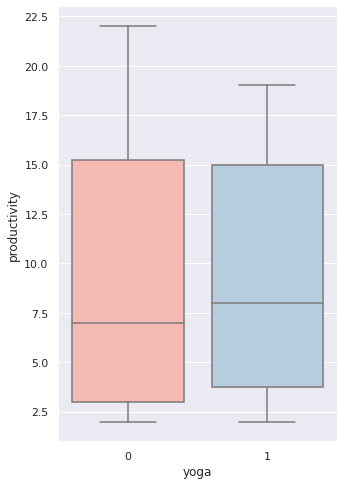

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))

sns.boxplot(data=df, y='productivity', x='yoga', palette="Pastel1", saturation=0.85, ax=ax)
plt.show()

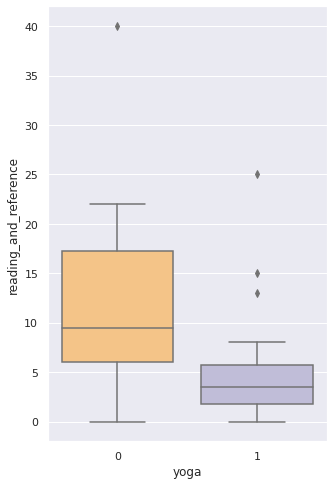

In [ ]:
fig, ax = plt.subplots(figsize=(5,8))

sns.boxplot(data=df, y='reading_and_reference', x='yoga', palette="PuOr", saturation=0.85, ax=ax)
plt.show()

### Correlation

In [ ]:
df.corr()

,total_screen_time,social_networking,reading_and_reference,other,productivity,health_and_fitness,entertainment,creativity,yoga
total_screen_time,1.000000,0.759385,0.377294,0.697843,0.440573,0.156904,0.356994,-0.290879,-0.412892
social_networking,0.759385,1.000000,0.004461,0.234066,0.124539,-0.092968,0.132916,-0.214764,-0.110716
reading_and_reference,0.377294,0.004461,1.000000,0.204553,0.162942,0.091587,0.012539,-0.302112,-0.381038
other,0.697843,0.234066,0.204553,1.000000,0.307073,0.236715,0.192795,-0.023360,-0.529736
productivity,0.440573,0.124539,0.162942,0.307073,1.000000,0.032934,0.186832,-0.336026,-0.001722
health_and_fitness,0.156904,-0.092968,0.091587,0.236715,0.032934,1.000000,-0.075065,-0.094262,-0.066414
entertainment,0.356994,0.132916,0.012539,0.192795,0.186832,-0.075065,1.000000,-0.083521,-0.203577
creativity,-0.290879,-0.214764,-0.302112,-0.023360,-0.336026,-0.094262,-0.083521,1.000000,0.203286
yoga,-0.412892,-0.110716,-0.381038,-0.529736,-0.001722,-0.066414,-0.203577,0.203286,1.000000


<ipython-input-54-c0221f1ae9f7>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

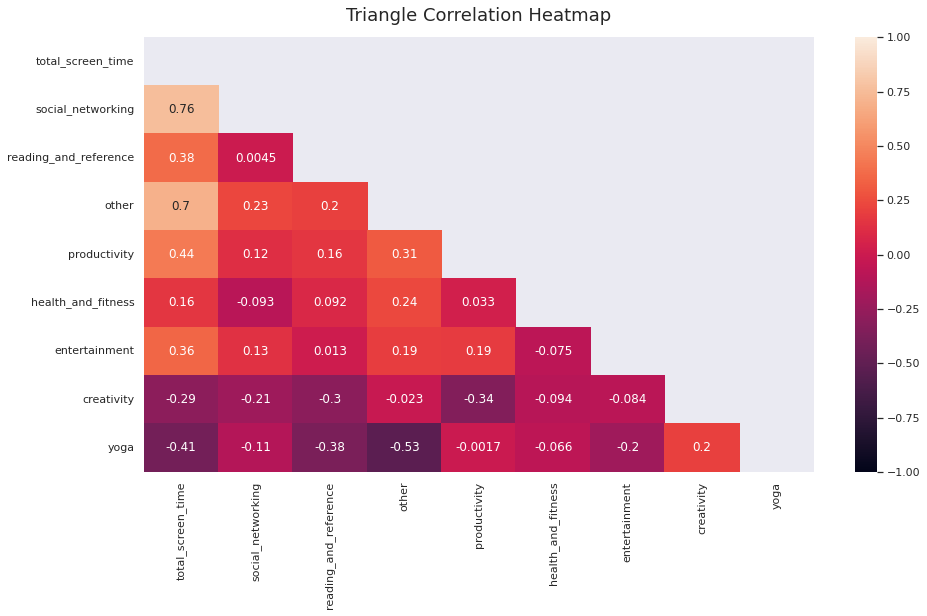

In [ ]:
# triangle correlation heatmap
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

As expected, we have a moderate negative correlation between daily yoga and total screen time and also, a weak positive correlation with creativity. 

In addiction, we have a strong positive correlation between total screen time and social networking, a moderate posite correlation between total screen time and productiviry and reading and reference.

### Independent Two Sample t-Test

Applying hypothesis test to confirm if the daily yoga impact screen time habits. We will analyze if two samples means are equal using the t-Test where: 

* Ho: Daily yoga doesn’t impact
* HA: Daily yoga impact
>
> Ho: μd = 0
>
> HA: μd != 0

Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [ ]:
# define samples

group1 = df[df['yoga']==0]
group2 = df[df['yoga']==1]

In [ ]:
# check Levene test for equal variances
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html

levene(group1['total_screen_time'], group2['total_screen_time'])

LeveneResult(statistic=0.36563792554883884, pvalue=0.5506327743772089)

Since the p-value is more than 0.05, we not reject the null hypothesis of the t-test and conclude that there is not sufficient evidence to say that the variances are different.

In [ ]:
# perform independent two sample t-test

ttest_ind(group1['total_screen_time'], group2['total_screen_time'])

Ttest_indResult(statistic=2.3115867975467426, pvalue=0.028984574045924572)

Since the p-value is less than 0.05, we reject the null hypothesis of the t-test and conclude that there is sufficient evidence to say that the daily yoga lead to different mean total screen time.

<a id='conclusions'></a>
## Conclusions

> Observing that the average of total screen time is shorter when practicing yoga daily and with a moderate negative correlation, we needed a the t-Test to confirm that the means are statistically different. In this case, the daily practice of yoga may be impacting the  total screen time.
>
> It is important to emphasize that with more data we can have a more reliable result.